### Importing libraries

In [1]:
import pandas as pd
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

### Data exploration

In [2]:
df = pd.read_csv('Cost_of_Living_Index_by_Country_2024.csv')

In [3]:
df.head(5)

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [4]:
df.tail(5)

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
116,117,Bangladesh,22.5,2.4,12.8,25.7,12.8,33.1
117,118,India,21.2,5.6,13.7,23.8,15.1,82.6
118,119,Egypt,21.0,3.7,12.7,21.2,16.2,20.0
119,120,Libya,20.4,4.3,12.7,22.2,15.2,42.0
120,121,Pakistan,18.8,2.8,11.1,17.5,12.9,29.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            121 non-null    int64  
 1   Country                         121 non-null    object 
 2   Cost of Living Index            121 non-null    float64
 3   Rent Index                      121 non-null    float64
 4   Cost of Living Plus Rent Index  121 non-null    float64
 5   Groceries Index                 121 non-null    float64
 6   Restaurant Price Index          121 non-null    float64
 7   Local Purchasing Power Index    121 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 7.7+ KB


In [6]:
df.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,61.000000,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,1.000000,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,31.000000,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,61.000000,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,91.000000,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,121.000000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


In [7]:
df.isnull().sum()

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

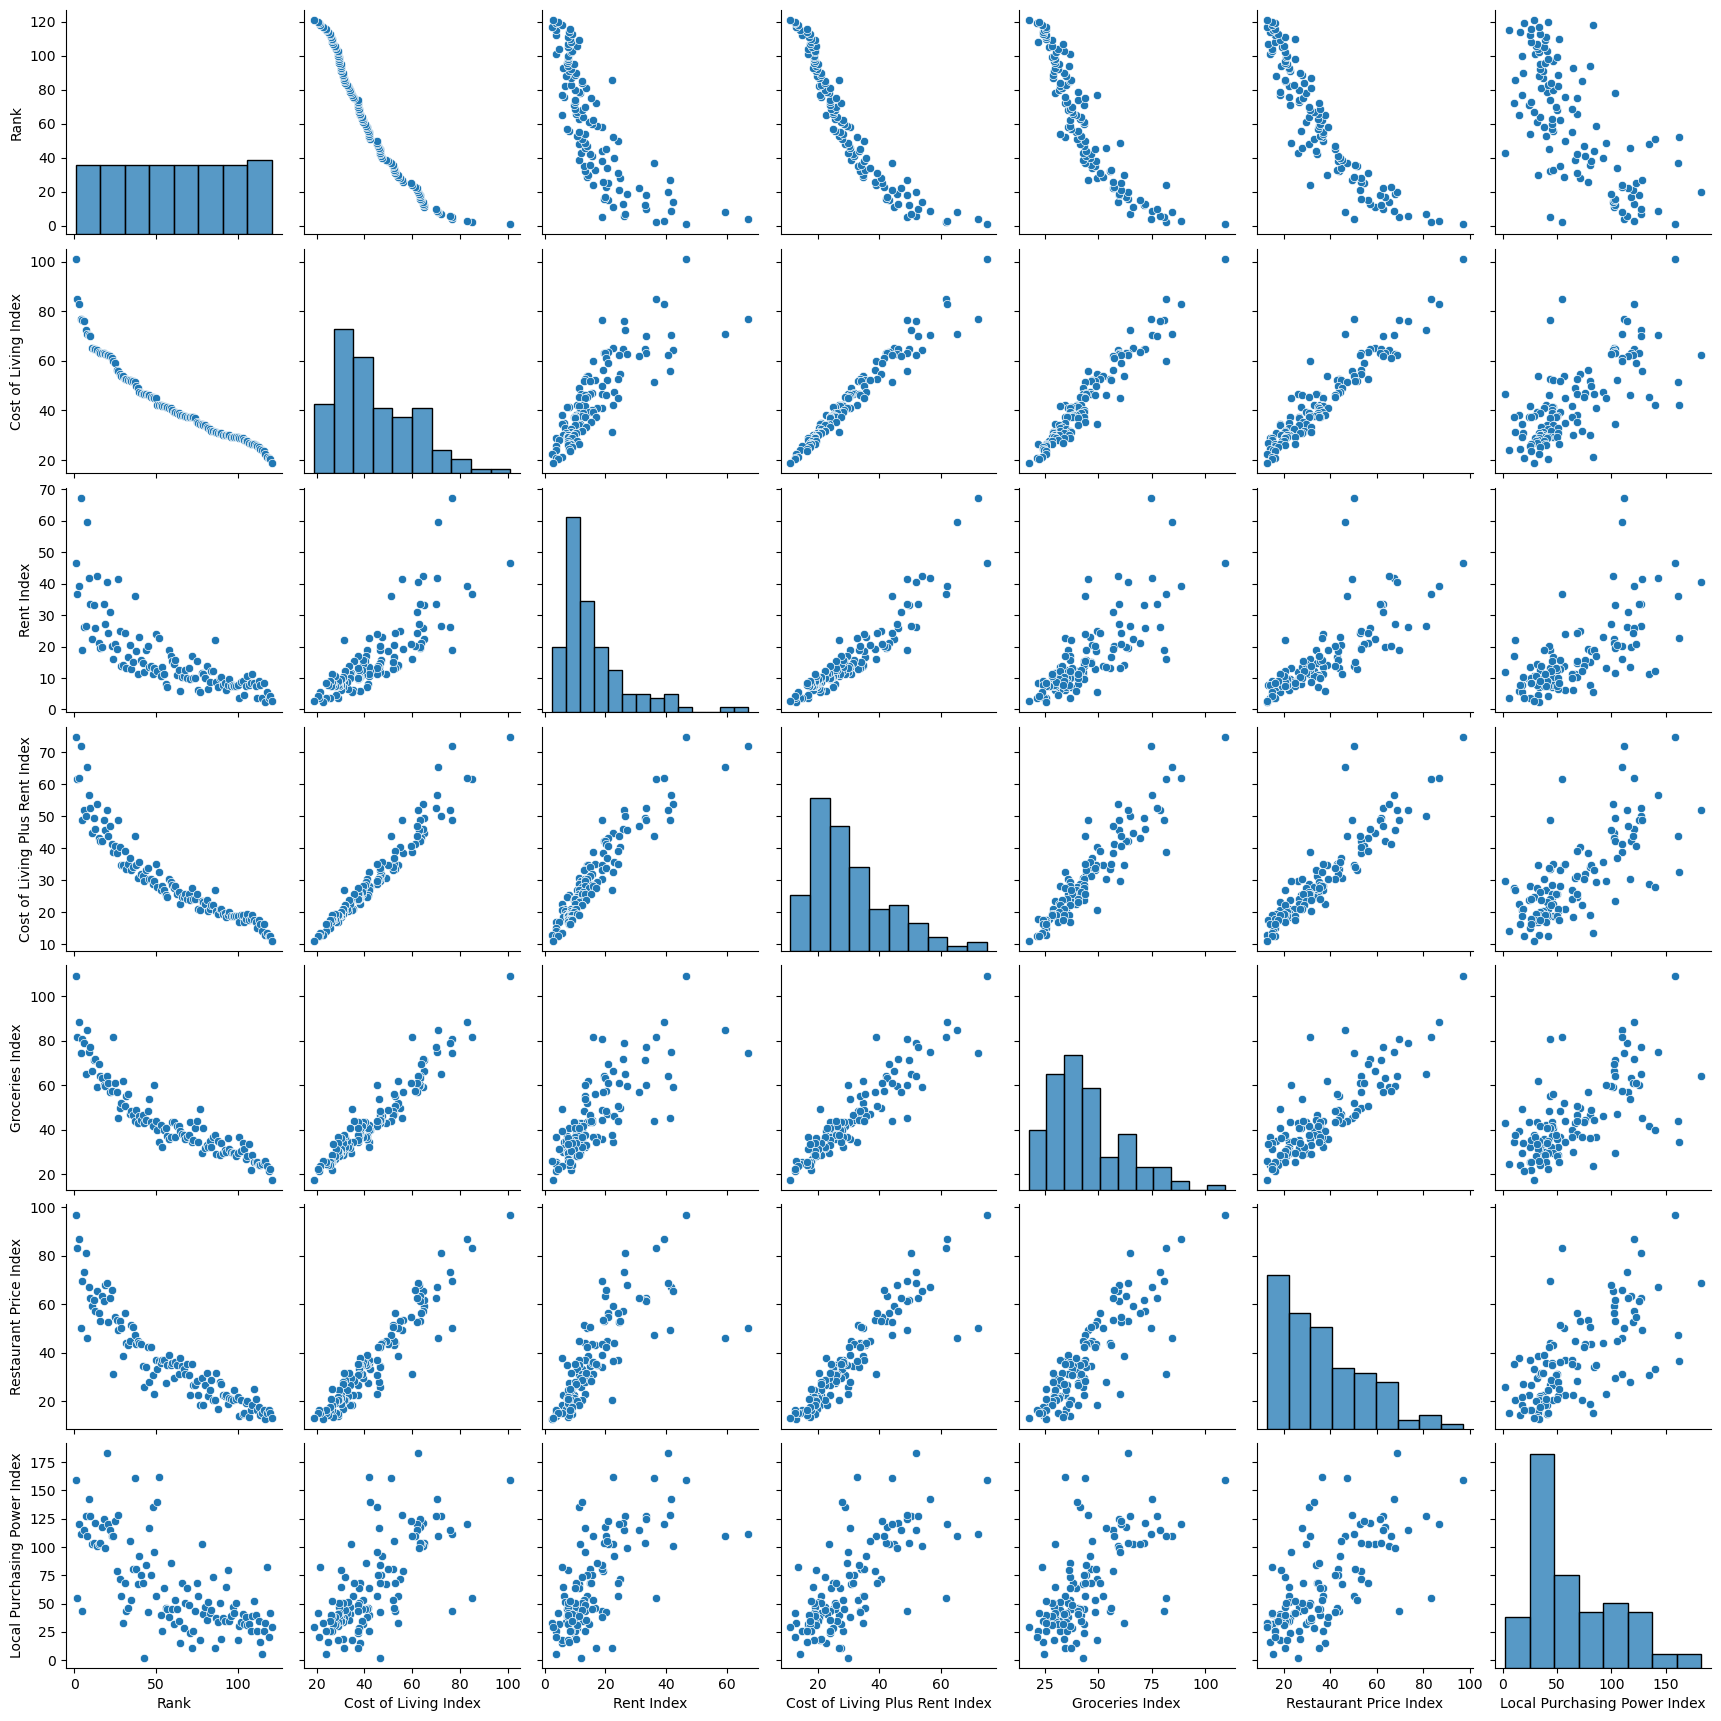

In [8]:
sns.pairplot(df);

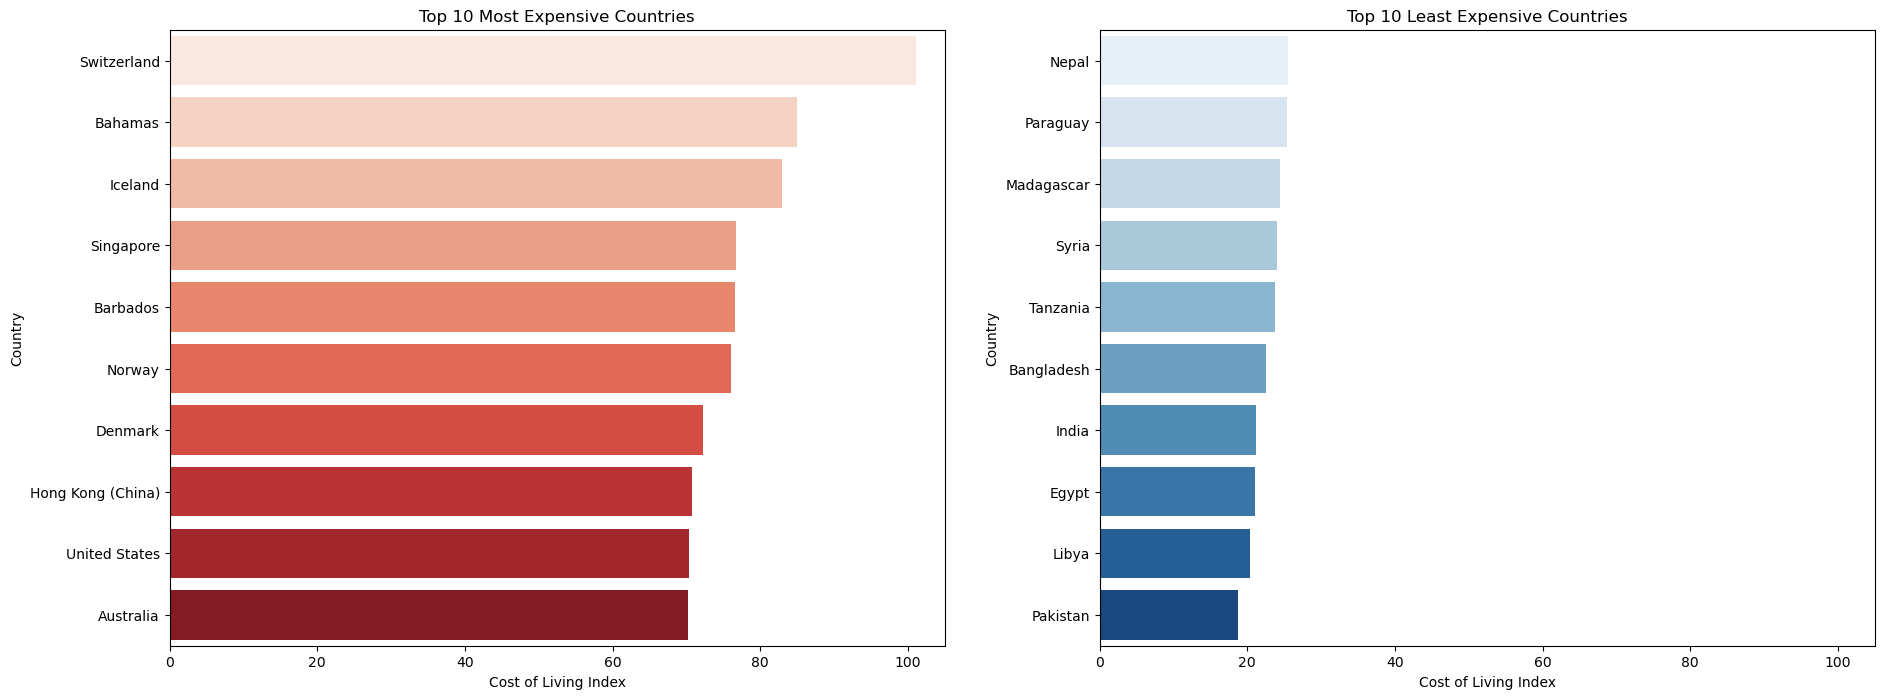

In [9]:
fig, ax = plt.subplots(1, 2, figsize = (22,8))

sns.barplot(data=df.head(10), x='Cost of Living Index', y='Country', palette='Reds',  ax=ax[0])
ax[0].set_title('Top 10 Most Expensive Countries')
ax[0].set_xlabel('Cost of Living Index')
ax[0].set_ylabel('Country')
ax[0].set_xlim(0,105)

sns.barplot(data=df.tail(10), x='Cost of Living Index', y='Country', palette='Blues',  ax=ax[1])
ax[1].set_title('Top 10 Least Expensive Countries')
ax[1].set_xlabel('Cost of Living Index')
ax[1].set_ylabel('Country')
ax[1].set_xlim(0,105)

plt.show();

### Data Cleaning&Preparing

In [10]:
df['Cost of Living Class'] = [2 if x > 65 else 1 if x > 40 else 0 for x in df['Cost of Living Index']]

In [11]:
df.head(10)

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Cost of Living Class
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7,2
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6,2
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3,2
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1,2
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5,2
5,6,Norway,76.0,26.2,52.1,79.0,73.5,114.7,2
6,7,Denmark,72.3,26.4,50.2,64.8,81.3,127.2,2
7,8,Hong Kong (China),70.8,59.4,65.3,84.6,46.2,109.3,2
8,9,United States,70.4,41.7,56.6,75.0,67.2,142.3,2
9,10,Australia,70.2,33.4,52.5,77.3,62.5,127.4,2


In [12]:
X = df[['Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']]
y = df['Cost of Living Class']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

### Classification Model

In [14]:
rfc = RandomForestClassifier(random_state=50)

In [15]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4]
}

In [16]:
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score from Grid Search:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}
Best Score from Grid Search: 0.8666666666666668


In [17]:
rfc_tuned = RandomForestClassifier(random_state=35, max_depth=None, 
                                   min_samples_leaf=1, min_samples_split=8, n_estimators=50)

In [18]:
rfc_tuned.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=8, n_estimators=50, random_state=35)

### Model Evaluation

In [19]:
y_pred = rfc_tuned.predict(X_test)

In [20]:
cm = confusion_matrix(y_test, y_pred)

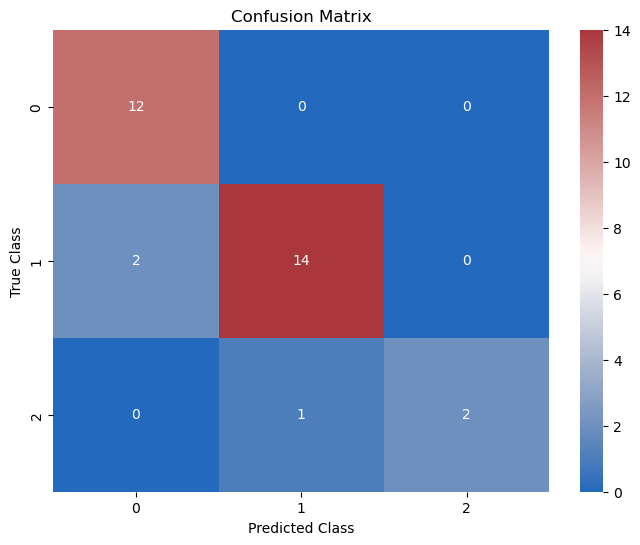

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='vlag')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

In [22]:
print(f"Accuarcy score: {round(accuracy_score(y_test, y_pred), 3)}")
print(f"F1 score: {round(f1_score(y_test, y_pred, average='weighted'), 3)}")

Accuarcy score: 0.903
F1 score: 0.901


In [23]:
importances = sorted(rfc_tuned.feature_importances_, reverse=True)
feature_names = X.columns.str.wrap(15)

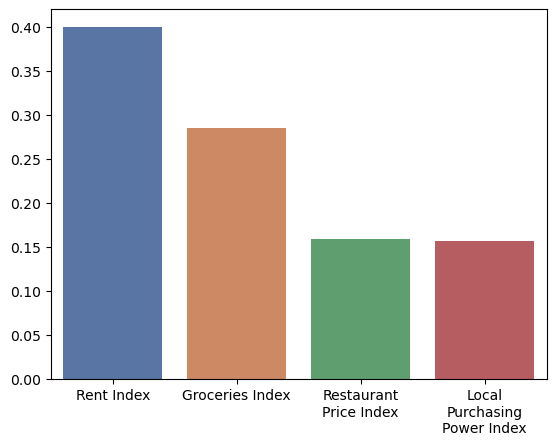

In [24]:
sns.barplot(x=feature_names, y=importances, palette="deep");
#plt.xticks(rotation=-45, ha='left')

plt.show();